<a href="https://colab.research.google.com/github/EdgaRojas/MachineLearning/blob/main/Unidad2/3_Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Random Forest

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Cargar el dataset
df = pd.read_csv("asesinatos.csv", encoding='latin-1')
df.head()

,Estado,id_area,habitantes,area_km2,ingresos_medios,edad_media_poblacion,densidad_poblacional,indice_gini,tasa_desempleo_juvenil,porcentaje_sin_diploma_secundaria,porcentaje_hogares_monoparentales,gasto_policial_per_capita,inversion_programas_sociales_per_capita,tiempo_respuesta_emergencias_min,porcentaje_zonas_verdes,tasa_asesinatos_por_100mil
0,Puebla,1,207953,26.70,48018,40.8,7787.47,0.522,21.8,30.3,40.0,867,240,3.0,5.0,27.1
1,Durango,2,80226,17.39,50295,42.4,4612.66,0.346,19.2,18.9,23.5,706,458,3.0,11.1,13.6
2,Tabasco,3,260806,70.69,50795,39.5,3689.22,0.417,23.0,33.5,23.8,981,403,4.3,8.1,20.6
3,Baja California Sur,4,969508,830.49,68910,27.3,1167.39,0.399,28.8,17.7,23.5,951,326,7.5,16.1,18.5
4,Aguascalientes,5,69478,30.59,54248,36.2,2271.26,0.422,16.4,33.6,27.6,563,353,7.2,10.6,16.8


In [4]:
X = df[['indice_gini', 'tasa_desempleo_juvenil', 'ingresos_medios', 'porcentaje_sin_diploma_secundaria']]
y = df['tasa_asesinatos_por_100mil']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [7]:
y_pred_rf = rf_model.predict(X_test)

mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Error cuadrático medio (MSE): {mse_rf:.2f}")
print(f"Coeficiente de determinación (R²): {r2_rf:.2f}")

Error cuadrático medio (MSE): 10.24
Coeficiente de determinación (R²): 0.49


In [8]:
import numpy as np
rmse = np.sqrt(mse_rf)
print(f"Raíz del Error cuadrático medio (RMSE): {rmse:.2f}")

Raíz del Error cuadrático medio (RMSE): 3.20


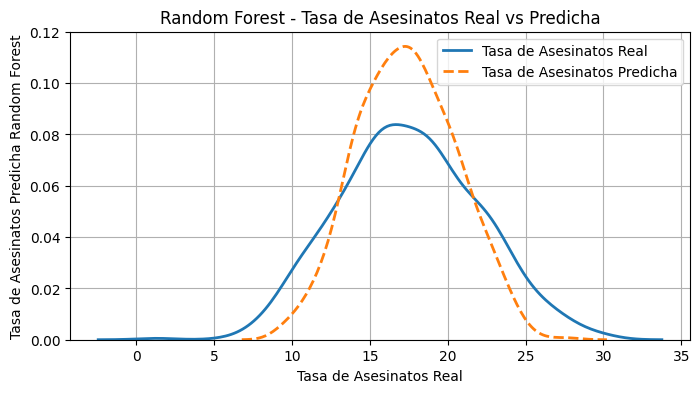

In [9]:
plt.figure(figsize=(8, 4))

sns.kdeplot(y_test, label='Tasa de Asesinatos Real', linewidth=2)
sns.kdeplot(y_pred_rf, label='Tasa de Asesinatos Predicha', linewidth=2, linestyle='--')

plt.title('Random Forest - Tasa de Asesinatos Real vs Predicha')
plt.xlabel('Tasa de Asesinatos Real')
plt.ylabel('Tasa de Asesinatos Predicha Random Forest')
plt.legend()
plt.grid(True)
plt.show()

In [20]:
# Modelo con parámetros ajustados
rf_model = RandomForestRegressor(
    n_estimators=200,       # más árboles
    max_depth=8,            # limitar profundidad
    min_samples_split=4,    # evitar divisiones con pocos datos
    min_samples_leaf=3,     # cada hoja al menos con 3 observaciones
    max_features='sqrt',    # usa raíz cuadrada del total de features
    random_state=42
)

rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse:.2f}")
print(f"R²: {r2:.2f}")
print(f"RMSE: {np.sqrt(mse):.2f}")


MSE: 9.66
R²: 0.52
RMSE: 3.11


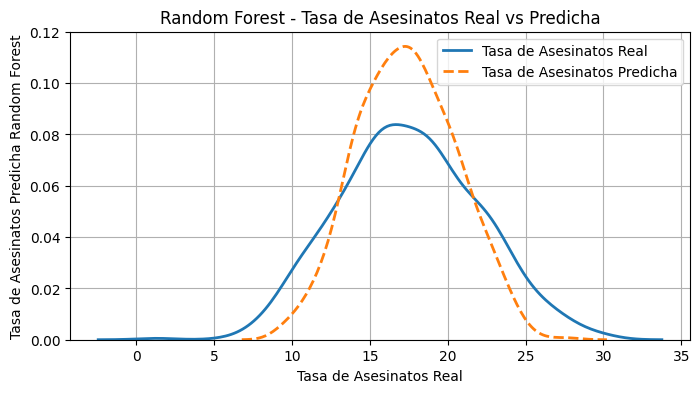

In [11]:
plt.figure(figsize=(8, 4))

sns.kdeplot(y_test, label='Tasa de Asesinatos Real', linewidth=2)
sns.kdeplot(y_pred_rf, label='Tasa de Asesinatos Predicha', linewidth=2, linestyle='--')

plt.title('Random Forest - Tasa de Asesinatos Real vs Predicha')
plt.xlabel('Tasa de Asesinatos Real')
plt.ylabel('Tasa de Asesinatos Predicha Random Forest')
plt.legend()
plt.grid(True)
plt.show()

In [12]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [4, 6, 8, None],
    'min_samples_split': [2, 4, 6],
    'min_samples_leaf': [1, 2, 3],
    'max_features': ['sqrt', 'log2']
}

grid_search = GridSearchCV(
    RandomForestRegressor(random_state=42),
    param_grid,
    cv=3,                # validación cruzada
    scoring='r2',
    n_jobs=-1,
    verbose=2
)

grid_search.fit(X_train, y_train)
print("Mejores parámetros:", grid_search.best_params_)
print("Mejor R²:", grid_search.best_score_)

Fitting 3 folds for each of 216 candidates, totalling 648 fits
Mejores parámetros: {'max_depth': 8, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 300}
Mejor R²: 0.4893918287505014


### Al aumentar el numero de los arboles en los parametros a 200 el el porcentaje paso de ser 49% a 52% y fue lo maximo que pude sacar cambiando los parametros, al utilizar mas conjuntos de datos con el random forest aumneto el porcentaje mas que en los demas algoritmos